This project is a dice game.
Game rules: You can throw a dice 100 times.
            You start from step 0.
            If it's 1 or 2 => you go a step backwards (-1)
            If it's 3,4 or 5 => you go a step forward(+1)
            If it's 6=> you will go forward x steps, where x is the number from the dice(1 => 1 step, 2=> 2 steps,...).
            You can't get lower than step 0.
            There is a small probability(0.1%) that you tripp and fall, in that case, you will start all over again from step 0.
    What is the chance that you reach 60 steps in 100 attempts to throw the dice?

An approach for solving this is simulating the process thousands of times and see what are the fractions where you reach 
60 steps.

## RANDOM GENERATORS

We will import the numpy package,and set the seed(so that the resulted random generated numbers should be the same between
simulations)

In [1]:
import numpy as np

In [2]:
np.random.seed(123)

We will create an empty all_walks list

In [3]:
all_walks=[]

We will simulate this random walk 10 times(the first for loop).
The second loop is for generation the random walk(each time we will throw the dice 100 times).

In [4]:
for i in range(0,250):
    #For each itteration we will create a random_walk list that will contain only one element with value 0(it starts from step 0)
    random_walk=[0]
    for x in range(100):
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice<=2:
            step=max(0,step-1)
        elif dice<=5:
            step=step+1
        else:
            step=step + np.random.randint(1,7)
        #Implement clumsiness
        if np.random.rand()<=0.0001:
            step=0
        random_walk.append(step)
    all_walks.append(random_walk)

In [5]:
print(all_walks)

[[0, 3, 2, 3, 2, 1, 0, 1, 2, 3, 4, 5, 4, 3, 4, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 15, 17, 16, 17, 18, 17, 18, 19, 21, 22, 23, 22, 23, 24, 23, 24, 25, 26, 30, 32, 34, 39, 40, 41, 40, 41, 42, 41, 40, 41, 47, 46, 45, 46, 47, 52, 51, 50, 49, 51, 52, 54, 55, 54, 55, 56, 57, 58, 57, 58, 62, 61, 62, 61, 60, 59, 58, 59, 60, 61, 62, 64, 65, 64, 63, 64, 65, 66, 68, 69, 68, 69, 70, 69, 70], [0, 5, 4, 3, 4, 5, 6, 7, 8, 9, 8, 14, 13, 14, 18, 22, 24, 26, 29, 30, 29, 30, 31, 32, 31, 32, 38, 37, 38, 39, 41, 40, 41, 47, 48, 49, 50, 49, 48, 49, 50, 49, 53, 52, 53, 54, 55, 59, 60, 59, 61, 60, 59, 60, 59, 58, 59, 64, 63, 62, 66, 69, 70, 72, 73, 72, 71, 72, 73, 72, 71, 76, 77, 78, 77, 76, 77, 78, 84, 85, 86, 87, 88, 87, 86, 87, 88, 87, 86, 87, 88, 87, 88, 89, 90, 89, 90, 91, 90, 93, 94], [0, 0, 1, 2, 4, 3, 2, 3, 7, 8, 9, 12, 13, 14, 13, 12, 18, 19, 18, 17, 18, 19, 18, 19, 24, 25, 31, 37, 39, 40, 46, 45, 46, 45, 46, 48, 49, 48, 49, 53, 52, 51, 52, 53, 54, 53, 52, 53, 52, 51, 52, 51, 52, 53, 52, 53, 54, 55

This is a list of lists: every sub-list represents a single random walk. We can convert this to a numpy array.

In [6]:
np_aw = np.array(all_walks)

We will use matplotlib to visualize this array.

In [7]:
import matplotlib.pyplot as plt

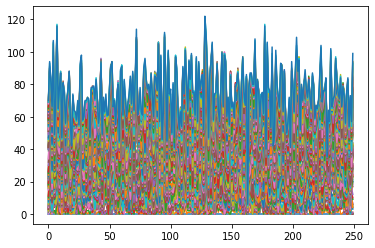

In [8]:
plt.plot(np_aw)
plt.show()

Transpose this array:

In [9]:
np_aw_t = np.transpose(np_aw)
np_aw_t

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 3,  5,  0, ...,  0,  1,  1],
       [ 2,  4,  1, ...,  2,  0,  0],
       ...,
       [70, 90, 80, ..., 71, 53, 94],
       [69, 93, 81, ..., 72, 54, 93],
       [70, 94, 82, ..., 73, 57, 99]])

Now,every row represents the position after one throw of the dice.

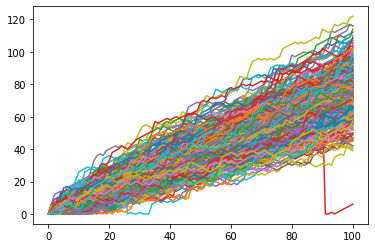

In [10]:
plt.plot(np_aw_t)
plt.show()

PLOT THE DISTRIBUTION

What are the chances that you can reach 60 steps high?

Select the last row of the transpose array: this will contain the endpoint(the last step) of all simulated random walks.

In [11]:
ends = np_aw_t[-1,:]
ends

array([ 70,  94,  82,  66, 107,  49,  72, 116,  65,  78,  87,  47,  81,
        75,  56,  70,  77,  88,  55,  42,  74,  64,  63,  58,  70,  55,
        93,  98,  58,  60,  70,  70,  72,  71,  47,  78,  78,  79,  71,
        83,  71,  56,  63,  94,  49,  72,  63,  74,  61,  61,  79,  91,
        94,  66,  70,  55,  73,  80,  45,  89,  91,  61,  83,  71,  60,
        68,  74,  85,  68,  88,  64,  84, 114,  61,  65,  78,  63,  61,
        90,  96,  83,  77,  80,  71,  87,  73,  60,  85,  84,  76, 105,
        57,  98,  46,  63, 112,  81,  45, 101,  74,  77,  50,  81,  47,
        97,  90,  66,  52,  63,  54,  91,  74, 101,  81,  64,  95,  83,
        99,  75,  75,  61,  97,  57,  94,  76,  82,  86,  52, 122, 110,
        91,  47,  85,  94, 106,  58,  74,  75,  93,  64,  57,  76, 100,
        66,  98,  94,  60,  72,  55,  85,  66,  69,  59,  78,  81,  87,
        75,  58,  80,  97,  75,  67,  86,   6,  78,  87,  87,  80,  80,
       108,  59,  83,  76,  60,  73,  75,  62, 116,  40, 106,  7

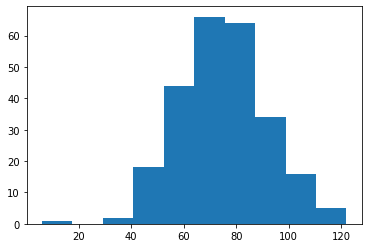

In [12]:
plt.hist(ends)
plt.show()

We need to calculate the chances that from this 250 simulations, the endpoint is >=60 (we can count the values from the array that are >=60 and divide them by 250).

In [13]:
correct_ends=ends[ends>=60]

In [14]:
correct_ends

array([ 70,  94,  82,  66, 107,  72, 116,  65,  78,  87,  81,  75,  70,
        77,  88,  74,  64,  63,  70,  93,  98,  60,  70,  70,  72,  71,
        78,  78,  79,  71,  83,  71,  63,  94,  72,  63,  74,  61,  61,
        79,  91,  94,  66,  70,  73,  80,  89,  91,  61,  83,  71,  60,
        68,  74,  85,  68,  88,  64,  84, 114,  61,  65,  78,  63,  61,
        90,  96,  83,  77,  80,  71,  87,  73,  60,  85,  84,  76, 105,
        98,  63, 112,  81, 101,  74,  77,  81,  97,  90,  66,  63,  91,
        74, 101,  81,  64,  95,  83,  99,  75,  75,  61,  97,  94,  76,
        82,  86, 122, 110,  91,  85,  94, 106,  74,  75,  93,  64,  76,
       100,  66,  98,  94,  60,  72,  85,  66,  69,  78,  81,  87,  75,
        80,  97,  75,  67,  86,  78,  87,  87,  80,  80, 108,  83,  76,
        60,  73,  75,  62, 116, 106,  78,  76, 103, 101,  80,  73,  66,
        93,  92,  63,  89,  72,  94,  79,  63,  88, 109,  88,  95,  80,
        70,  80,  89,  77,  72,  83,  72,  65,  87,  80,  67,  6

In [15]:
len(correct_ends)/250

0.82

Seems that the chances that you reach 60 steps from throwing the dice 100 times is 82%,quite high.